# Summarise the previous results: clean and add the volume and dual computation functions, validate the results

In [1]:

from scipy.spatial import Delaunay
#import polyscope as ps

# ddg imports
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

## Imports and physical parameters
# std library

# plotting

# ddg imports
# Allow for relative imports from main library:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

#from ddgclib._case1 import *
from ddgclib._capillary_rise import * #plot_surface#, curvature
from ddgclib._plotting import *

# compute duals (and Delaunay dual from a set of points)
from ddgclib.ddgclib.barycentric import compute_vd, triang_dual

# Plots
from ddgclib.ddgclib.barycentric import plot_dual_mesh_2D, plot_dual_mesh_3D

# Geometry and dual computations
from ddgclib.ddgclib.barycentric import area_of_polygon, volume_of_geometric_object, plot_dual
              
# Boundary geometry                  
from ddgclib.ddgclib.barycentric import  _set_boundary, _find_plane_equation, _find_intersection, _reflect_vertex_over_edge

# Area computations

# DDG gradient operations on primary edges (for continuum)

def incom_Poi(domain, refinements=2):
    """
    Compute the triangulate of a 2D incompressible Poiseuile flow
    """
    HC = Complex(2, domain)
    HC.triangulate()
    for i in range(refinements):
        HC.refine_all()

    points = []
    for v in HC.V:
        points.append(v.x_a)
    points = np.array(points, dtype='float64')
    tri = Delaunay(points)
    return points




# 2D

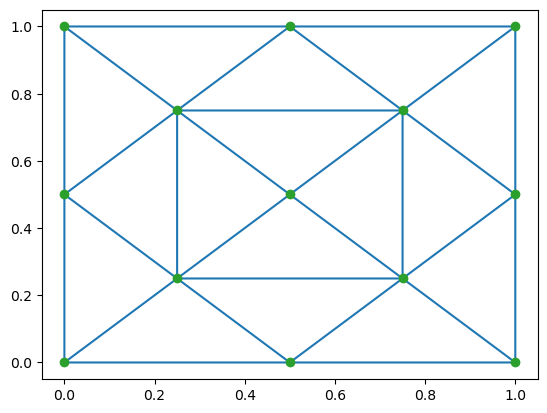

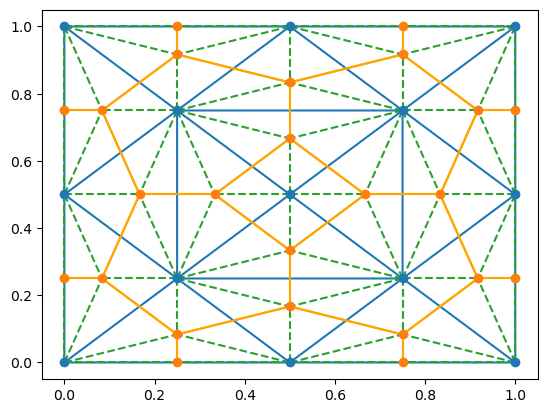

In [2]:
#NOTE: This was moved after defining the code below to validate the 2D:
domain = [(0, 1),]*2

points = incom_Poi(domain, refinements=1)
HC, tri = triang_dual(points, plot_delaunay=True)
#HC.dim = 2
# NEW: Compute boundaries
bV = set()
for v in HC.V:
    if ((v.x_a[0] == 0.0 or v.x_a[1] == 0.0) or
        (v.x_a[0] == 1.0 or v.x_a[1] == 1.0)):
        bV.add(v)
        
for bv in bV:
    _set_boundary(bv)
    
# Now compute duals as normal   
compute_vd(HC, cdist =1e-10)

plot_dual_mesh_2D(HC, tri, points)

# 3 D


#### Test if the sum of unit cube dual volumes is 1 m$^3$ as expected

/home/endres/projects/ddg/ddgclib/ddgclib/_complex.py:2906: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.fig_complex.show()


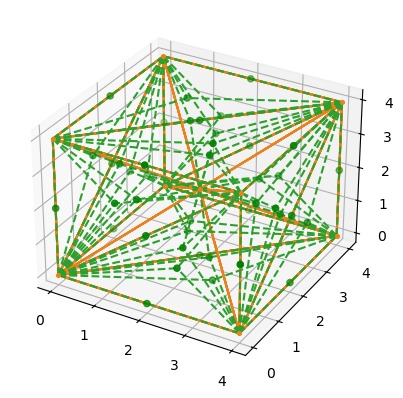

In [3]:
domain = [(0, 4.0),]*3
#symmetry = [0, 1, 1]
HC = Complex(3, domain=domain, symmetry=None)
HC.triangulate()
for i in range(0):
    HC.refine_all_star()

# NEW
# Compute boundaries
bV = set()
for v in HC.V:
    if ((v.x_a[0] == 0.0 or v.x_a[1] == 0.0 or v.x_a[2] == 0.0) or
        (v.x_a[0] == 4.0 or v.x_a[1] == 4.0 or v.x_a[2] == 4.0)):
        bV.add(v)
        
for bv in bV:
    _set_boundary(bv, True)
for v in HC.V:
    if not (v in bV):
        _set_boundary(v, False)
    
    
#for v in HC.V:
#    if (v in bV):
#        continue
#    else:
#        _set_boundary(bv, False)
        
# Compute duals     
compute_vd(HC, cdist =1e-10)

# Add dual points
dual_points = []
for vd in HC.Vd:
    dual_points.append(vd.x_a)

dual_points = np.array(dual_points, dtype='float64')
#hcaxes.scatter(dual_points)
plot_dual_mesh_3D(HC, dual_points)
#dual_points

import polyscope as ps
v = HC.V[(0.0, 0.0, 0.0)]
v2 = HC.V[(0.0, 4.0, 4.0)]
#TEST fix of dual point:
#vd = [0.0, 1.5, 2.5]


In [4]:
v = HC.V[(2.0, 2.0, 2.0)]
v = HC.V[(0.0, 0.0, 0.0)]
plot_dual(v, HC)
ps.show()


[polyscope] Backend: openGL3_glfw -- Loaded openGL version: 3.3.0 NVIDIA 565.77
verts = [[0.         0.         2.        ]
 [0.         1.33333333 2.66666667]
 [0.5        1.5        2.5       ]
 [1.5        0.5        2.5       ]
 [1.33333333 0.         2.66666667]
 [2.         0.         2.        ]
 [2.5        0.5        1.5       ]
 [2.66666667 0.         1.33333333]
 [1.         1.         1.        ]
 [2.5        1.5        0.5       ]
 [1.5        2.5        0.5       ]
 [0.5        2.5        1.5       ]
 [0.         2.         2.        ]
 [0.         2.66666667 1.33333333]
 [0.         2.         0.        ]
 [1.33333333 2.66666667 0.        ]
 [2.         0.         0.        ]
 [2.66666667 1.33333333 0.        ]
 [2.         2.         0.        ]]


# Area test

In [5]:

#from area_of_polygon import area_of_polygon

def test_area_of_square():
  """Tests the area of a square."""

  square_points = np.array([[0, 0], [1, 0], [1, 1], [0, 1]])
  expected_area = 1

  calculated_area = area_of_polygon(square_points)

  assert calculated_area == expected_area

def test_area_of_triangle():
  """Tests the area of a triangle."""

  triangle_points = np.array([[0, 0], [1, 0], [0.5, 1]])
  expected_area = 0.5

  calculated_area = area_of_polygon(triangle_points)

  assert calculated_area == expected_area

def test_area_of_polygon_with_holes():
  """Tests the area of a polygon with holes."""

  polygon_points = np.array([[0, 0], [1, 0], [1, 1], [0, 1], [0.5, 0.5]])
  hole_points = np.array([[0.25, 0.25], [0.75, 0.25], [0.75, 0.75], [0.25, 0.75]])
  expected_area = 1 - 0.25

  calculated_area = area_of_polygon(polygon_points, [hole_points])

  assert calculated_area == expected_area

test_area_of_triangle()
test_area_of_square()
test_area_of_polygon_with_holes()

AxisError: axis 1 is out of bounds for array of dimension 1

## Volumes
### Test pyramid

In [ ]:
import numpy as np
#from volume_of_geometric_object import volume_of_geometric_object

# Create a pyramid with a known volume.
pyramid_points = np.array([[0, 0, 0], [10, 0, 0], [10, 10, 0], [0, 10, 0],
                          [5, 5, 5]])
pyramid_volume = 166.67

# Calculate the volume of the pyramid using your code.
pyramid_volume_calculated = volume_of_geometric_object(pyramid_points[:-1], pyramid_points[-1])

# Compare the calculated volume to the known volume.
pyramid_volume_calculated

In [ ]:
import typing
def Newbroken_reflect_vertex_over_edge(triangle: typing.Tuple[np.ndarray, np.ndarray, np.ndarray],
                              target_index: int = 0) -> typing.Tuple[np.ndarray, np.ndarray, np.ndarray]:
    """
    Reflect a given vertex of a triangle over the opposing edge, maintaining the same plane.

    Args:
        triangle (Tuple[np.ndarray, np.ndarray, np.ndarray]): A triple containing the vertices of the triangle.
        target_index (int): Index of the vertex to reflect (default: 0).

    Returns:
        Tuple[np.ndarray, np.ndarray, np.ndarray]: Updated triangle with the reflected vertex.
    """
    p0, p1, p2 = triangle
    p_opposite = triangle[(target_index + 1) % 3]

    # Calculate the midpoint of the opposing edge
    p_midpoint = (p_opposite + triangle[(target_index + 2) % 3]) / 2

    # Determine the unit normal vector of the plane
    n = np.cross(p1 - p0, p2 - p0)
    n = n / np.linalg.norm(n)

    # Project onto the plane
    projection = p_midpoint - n * np.dot(n, p_midpoint)

    # Calculate the position of the reflected vertex
    reflected = projection + 2 * (p_midpoint - projection)

    # Construct the updated triangle
    updated_triangle = np.array([triangle[0], triangle[1], triangle[2]])
    updated_triangle[target_index] = reflected

    return updated_triangle

In [ ]:


import numpy as np

def _reflect_vertex_over_edge(triangle, target_index=0):
    """
    Reflect a given vertex (passed as array) of a triangle over the opposing edge, 
    maintaining the same plane.
    
    Args:
        v0
    
    Returns:
        tuple: Updated triangle with the refleced vertex.
    """
    print('.')
    print(f'triangle = {triangle}')
    print(f'target_index = {target_index}')
    if 0:
        p0, p1, p2 = triangle[0], triangle[1], triangle[2]  # TODO: Check out LLM log again
        p_opposite = triangle[(target_index+1) % 3]  # Cycle one forward from index
        p_midpoint = (p_opposite + triangle[(target_index+2) % 3]) / 2
        p_opposite = triangle[(target_index + 1) % 3]
        #[_opposite = triangle[(target_index + 2) % 3]
        #p_opposite = triangle[target_index]
        #p_midpoint = (p_opposite + triangle[(target_index+2) % 3]) / 2
    
    
    p_o = triangle[target_index]
    p_1 = triangle[(target_index + 1) % 3]
    p_2 = triangle[(target_index + 2) % 3]
    p_midpoint = (p_1 + p_2) / 2
    # Move along the direction of (p_midpoint-p0) for twice the distance
    p_ref = p_o + 2 * (p_midpoint - p_o)
    print(f'p_midpoint = {p_midpoint}')
    if 0:
        
        # Move along the direction of (p_midpoint-p0) for twice the distance
        reflected = p0 + 2 * (p_midpoint - p0)
    
    triangle[target_index] = p_ref
    print('.')
    return triangle



def _find_intersection(plane1, plane2, plane3):
    # Extract coefficients from each plane equation
    a1, b1, c1, d1 = plane1
    a2, b2, c2, d2 = plane2
    a3, b3, c3, d3 = plane3

    # Coefficients matrix (A)
    A = np.array([[a1, b1, c1],
                  [a2, b2, c2],
                  [a3, b3, c3]])

        # Check if the matrix is singular
    if np.linalg.det(A) == 0:
        raise ValueError("The planes are parallel or nearly parallel. No unique solution.")


    # Right-hand side vector (b)
    b = np.array([-d1, -d2, -d3])

    # Solve the system of linear equations
    intersection_point = np.linalg.solve(A, b)

    return intersection_point

def _find_plane_equation(vertex1, vertex2, vertex3):
    # Compute vectors lying in the plane
    vector1 = np.array(vertex2) - np.array(vertex1)
    vector2 = np.array(vertex3) - np.array(vertex1)

    # Compute the normal vector using the cross product
    normal_vector = np.cross(vector1, vector2)

    # Extract coefficients for the plane equation ax + by + cz + d = 0
    a, b, c = normal_vector
    d = -np.dot(normal_vector, np.array(vertex1))

    # Return the coefficients [a, b, c, d]
    return [a, b, c, d]


def compute_dual_on_boundary_face(v1, v2):
    """
    Computes the dual vertex that is on the boundary face, there are two of these
    duals associated with every primal edge e_12 = v2 - v1. generates vd1 and vd2 
    connected to three primal vertices each.
    :param v1: origin vertex, must have the v1.boundary = True property
    :param v2: termination vertex, must have the v1.boundary = True property
    :return: None
    """

    #TODO: Remove older code in main loop that does this:
    # Compute the dual on the primary edge
    cd = v1.x_a + 0.5 * (v2.x_a - v1.x_a)
    vd12 = HC.Vd[tuple(cd)]
    v1.vd.add(vd12)
    v2.vd.add(vd12)
    
    # Find the other two duals connected to both v1 and v2,
    # the set v1vd_n_v2vd should be length 3:
    #TODO: THIS WILL NOT STAY LENGTH 3 BECUASE THIS FUNCTION RUNS MORE THAN ONCE
    #      CAN BE SOLVED BY EXCLUDING POITNS FROM v3 below?
    #TODO: remove any verted in v3.vd from? v1vd_n_v2vd
    v1vd_n_v2vd = v1.vd.intersection(v2.vd)
    print(f'v1vd_n_v2vd = {v1vd_n_v2vd}')
    for vsad in v1vd_n_v2vd:
        print(f'vd = {vsad.x}')
    # Find all v2.nn also connected to v1:
    # Find the other two primary edges
    v1nn_n_v2nn = v1.nn.intersection(v2.nn)
    
    # Remove previousely computed vertices 
    #TODO: If two are found here simply connect to v1 and v2?
    if 1:
        # Check if exactly two elements of v1vd_n_v2vd intersect with HC.V_bfaces
        if len(HC.V_bfaces.intersection(v1vd_n_v2vd)) == 2:
            # Retrieve the two intersection elements
            intersection_elements = list(HC.V_bfaces.intersection(v1vd_n_v2vd))
        
    v1vd_n_v2vd = v1vd_n_v2vd.difference(HC.V_bfaces)
    # Check if we already have verts defined for both boundary faces, 
    # we can then exit this routine:
    if len(HC.V_bfaces.intersection(v1nn_n_v2nn)) > 2:
        return
    
    print(v1nn_n_v2nn)
    for v3 in v1nn_n_v2nn:
        print('='*100)
        print(f'v3 = {v3.x}')
        if (v3 is v1):
            continue  # Unneeded?
        try:
            if v3.boundary:
                if 0:  #NOTE: if 1:, then we might need to add vd_123 to v3 at the end.
                    face_verts = HC.V_bfaces.intersection()
                    if len(face_verts) == 2:
                       #TODO: ADD CONNECTION
                       continue  # continue 
                # Found one of two boundary triangles, vd_i lies in this plane
                tri1 = np.array([v1.x_a, 
                                 v2.x_a, 
                                 v3.x_a])

                print('-')
                
                # Find the 3 vertices forming the triangle dual to e_13 = v3 - v1
                if 1:
                    cd = v1.x_a + 0.5 * (v3.x_a - v1.x_a)
                    vd13 = HC.Vd[tuple(cd)]
                    v1.vd.add(vd13)
                    v3.vd.add(vd13)
                    #vd13.nn.add(v1)
                    #vd13.nn.add(v3)
                   
                    # Find the duals of the v1, v3 tetrahedron
                    #TODO: Remove HC.V_bfaces here:

                    #print(f'v3.vd = {v3.vd}')
                    v1vd_n_v3vd = v1.vd.intersection(v3.vd)
                    #print(f'v1vd_n_v3vd before = {v1vd_n_v3vd}')
                    #print(f'HC.V_bfaces = {HC.V_bfaces}')
                    v1vd_n_v3vd = v1.vd.intersection(v3.vd).difference(HC.V_bfaces)
                    #print(f'v1vd_n_v3vd after = {v1vd_n_v3vd}')
                    # The vertex to be flipped is not vd13 and not connected to v2
                    vd13_l = []
                    for i, vd in enumerate(v1vd_n_v3vd):
                        vd13_l.append(vd.x_a)
                        if ((vd not in v2.vd)) and (vd is not vd13):
                            flip_ind = i
                    #print(vd13_l)
                    tri3 = np.array(vd13_l)
                    
                    #tri2[flip_ind] = _reflect_vertex_over_edge(tri2[0], 
                    #                                           tri2[1], 
                    #                                           tri2[2], 
                    #                                           target_index=flip_ind)
                    #print(f'tri3 = {tri3}')
                    tri3 = _reflect_vertex_over_edge(tri3, target_index=flip_ind)
                    #print(f'tri3 = {tri3}')
                
                # Finally find the third triangle
                # Find the 3 vertices forming the triangle dual to e_12
                # Find the reflected triangle of the edge e_12 = v2 - v1
                print('-')
                print('Runing for vd12 tri')
                print('-')
                vd12_l = []
                for i, vd in enumerate(v1vd_n_v2vd):
                    print(f'vd = {vd.x}')
                    vd12_l.append(vd.x_a)
                    print(f'not vd in v3.vd = {not vd in v3.vd}')
                    print(f'not vd is vd12 = {not vd is vd12}')
                    if (not vd in v3.vd) and (not vd is vd12):
                        print(f'i = {i}')
                        flip_ind = i
                        
                print('=')
                tri2 = np.array(vd12_l)
                #_reflect_vertex_over_edge(vd0, vd1, vd2, target_index=0)
                tri2 = _reflect_vertex_over_edge(tri2, target_index=flip_ind)
                # Find the 3 vertices forming the triangle dual to e_12
                print(f'tri2 = {tri2}')
                print('HIT!')
                # Add the newly founded vertices to  HC.V_bfaces so that it 
                # doesn't get reused
                #HC.V_bfaces.add()

        except AttributeError:
            continue

        # Finally find the dual solution 
        planes = []
        tri1 = np.array(tri1,dtype=np.float64)
        tri2 = np.array(tri2,dtype=np.float64)
        tri3 = np.array(tri3,dtype=np.float64)
        for tri in [tri1, tri2, tri3]:
             plane = _find_plane_equation(tri[0], tri[1], tri[2])
             planes.append(plane)
        print(f'plane[0] = {plane[0]}')
        try:
            vd_123 = _find_intersection(planes[0], planes[1], planes[2])
        except ValueError as ve:
            print(f'{ve}')
            continue
        vd_123 = HC.Vd[tuple(vd_123)]
        #TODO: CHECK WHAT IS NEEDED:
        v1.vd.add(vd_123)
        v2.vd.add(vd_123)
        # Add the newly founded vertices to  HC.V_bfaces so that it 
        # doesn't get reused
        HC.V_bfaces.add(vd_123)
        
v1 = HC.V[0,0,0]
v2 = HC.V[0,0,4]
#@for v in v2.vd:
#    print(f'v in v2.vd = {v.x}')


#NOTE: It is _needed_ to first define this set to preserve triangles 
#      and lower algorithmic complexity.
HC.V_bfaces = getattr(HC, 'V_bfaces', set())
        
compute_dual_on_boundary_face(v1, v2)


#plot_dual(v, HC)
#ps.show()